### _EXACTSPACE DATA SCIENCE INTERNSHIP ASSIGNMENT_
## __Part 1: Machine Data Analysis (Timeseries)__

---

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### 1. Data Preparation & Exploratory Analysis

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


We need to convert the data types of all features aprat from time to numeric.

In [4]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col] is not "time":
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


>##### __1.1 Check for missing values__

In [6]:
df.isna().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [7]:
df.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,376399.000000,376128.000000,376398.000000,376399.000000,376398.000000,376397.000000
mean,2018-10-20 02:10:21.647840,727.348549,750.830483,-177.820685,-164.572619,715.759972,-141.302857
min,2017-01-01 00:00:00,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,2017-11-24 21:07:30,856.270000,867.667500,-247.190000,-226.770000,801.960000,-193.510000
50%,2018-10-19 18:10:00,882.380000,913.360000,-215.260000,-198.560000,871.525000,-169.460000
75%,2019-09-13 15:12:30,901.110000,943.660000,-170.130000,-143.640000,899.300000,-136.290000
max,2020-08-07 12:15:00,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000
std,NaN,328.664814,350.921068,99.147236,90.103023,325.346446,77.615576


My idea was to fill all the null values with the mean, provided that there isn't much variance for the feature. From the above output it is clear that there exists a heavy amount of variance. Moreover, dropping the nulls won't be helpful either as this would completely disrupt the time series data as well as the strict 5-minute indexing criteria. The next best bet is to use forward filling.

In [8]:
df_temp = df.copy()

In [9]:
df = df.fillna(method = "ffill")
df.isna().sum()
if len(df) - len(df_temp) != 0:
    print("Some data samples have been dropped! Carefully check previous steps again.")
else:
    print("All clear!")

All clear!


We can also check the difference between the data before and after applying forward filling to check if there is a huge difference.

In [10]:
df.describe() - df_temp.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,0,1320.000000,1591.000000,1321.000000,1320.000000,1321.000000,1322.000000
mean,0 days 00:00:00,-1.298574,-1.404495,0.362569,0.315049,-1.270224,0.279743
min,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:00:00,-0.370000,-0.587500,0.040000,0.050000,-2.680000,0.060000
50%,0 days 00:00:00,-0.060000,-0.130000,0.180000,0.130000,-0.125000,0.100000
75%,0 days 00:00:00,-0.010000,-0.065000,0.895000,1.200000,-0.060000,0.780000
max,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,NaN,1.089456,1.194657,0.233049,0.206107,1.040391,0.168133


Seemingly less variation exists before and after applying forward filling. 

>##### __1.2 Ensuring strict 5-minute indexing__

First we can check if the time difference between the first and second data sample is 5 minutes or not.

In [11]:
print(df['time'].iloc[1] - df['time'].iloc[0])

0 days 00:05:00


It is! Now we can save that into a variable and loop over the entire set of samples to check if at any point, the time difference is not 5 minutes.

In [12]:
def time_diff_check(df):

    time_diff = df['time'].iloc[1] - df['time'].iloc[0]

    for i in range(len(df['time']) - 1):
        if (df['time'].iloc[i + 1] - df['time'].iloc[i]) != time_diff:
            print("Non 5-minute index found!")
            print(f"{df['time'].iloc[i]} at index {i} & {df['time'].iloc[i + 1]} at index {i + 1}")
            print(f"Time difference: {df['time'].iloc[i + 1] - df['time'].iloc[i]}")
            print()
    print("Check complete!")

time_diff_check(df)

Non 5-minute index found!
2017-12-31 00:00:00 at index 104832 & 2018-01-01 00:00:00 at index 104833
Time difference: 1 days 00:00:00

Non 5-minute index found!
2018-12-31 00:00:00 at index 209665 & 2019-01-01 00:00:00 at index 209666
Time difference: 1 days 00:00:00

Non 5-minute index found!
2019-12-31 00:00:00 at index 314498 & 2020-01-01 00:00:00 at index 314499
Time difference: 1 days 00:00:00

Check complete!


We can infer that these are basically records at the same time, but right before end of the year and right after start of the next year. The differnece here will show 1 full day. We don't want that. So we fix this using `date_range` function from pandas.

In [13]:
clean_time = pd.date_range(start = df['time'].iloc[0], periods = len(df), freq = "5T") # 5 minutes
df['time'] = clean_time

In [14]:
time_diff_check(df)

Check complete!


Strict 5-minute indexing ensured!

>##### __1.3 Outlier analysis & handling__

We will use the classic IQR method to look for outliers.

In [15]:
def iqr_outliers(df):
    outliers = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    for col in outliers:
        print(f"Number of outliers in {col}: {len(outliers[col])}")
        
iqr_outliers(df)

Number of outliers in time: 0
Number of outliers in Cyclone_Inlet_Gas_Temp: 85816
Number of outliers in Cyclone_Material_Temp: 79776
Number of outliers in Cyclone_Outlet_Gas_draft: 82014
Number of outliers in Cyclone_cone_draft: 75350
Number of outliers in Cyclone_Gas_Outlet_Temp: 80770
Number of outliers in Cyclone_Inlet_Draft: 82481


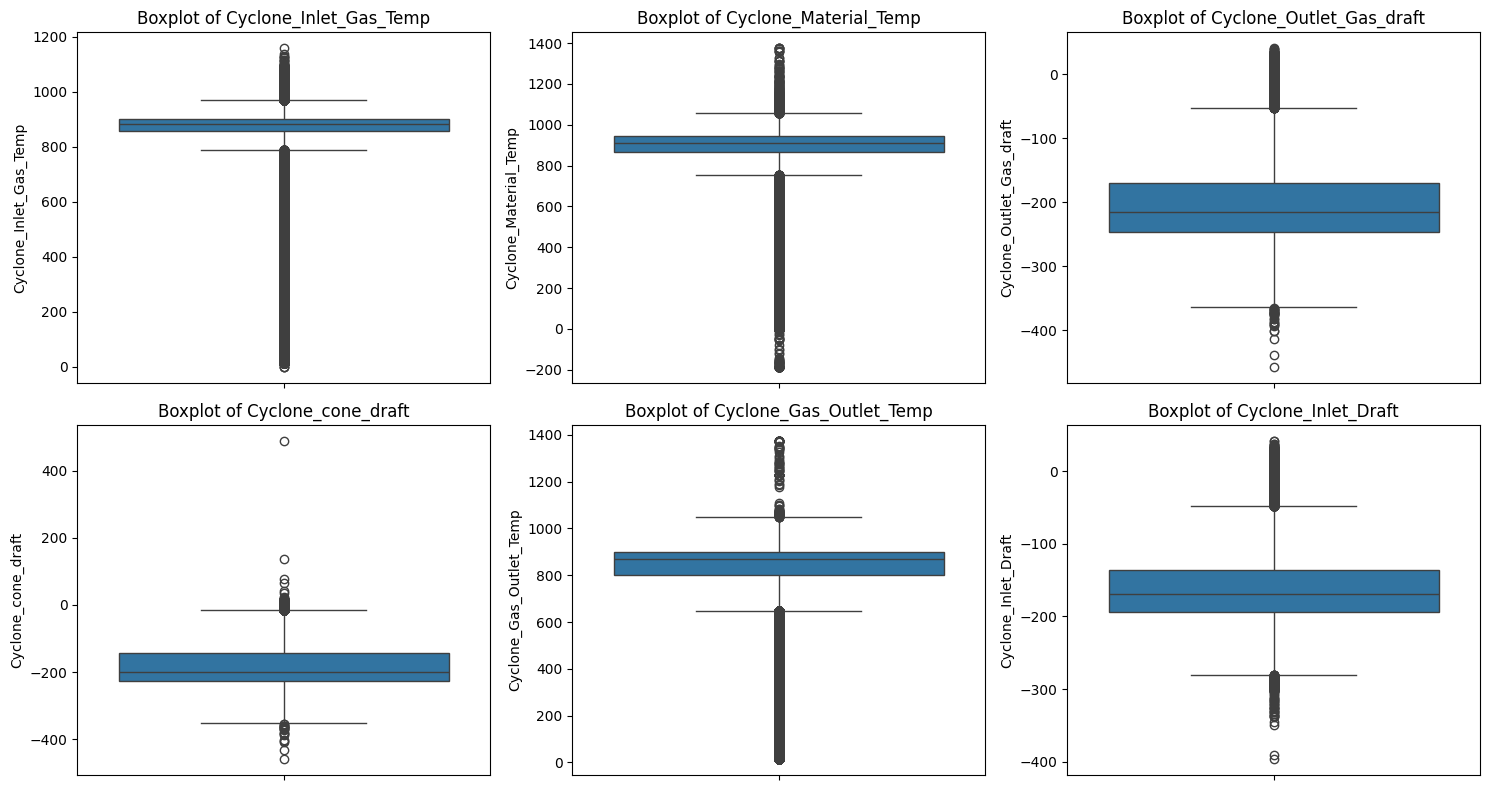

In [16]:
df_temp = df.copy()
df_temp = df.drop(columns = ['time'])

num_features = len(df_temp)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(df_temp.columns):
    sns.boxplot(y = df_temp[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Several outliers exist in all the features. However, dropping them is not helpful as that will disrupt the time series data and break the strict 5-minute index interval rule. Another option is to cap the outliers using the IQR method, which limits extreme values to the upper and lower bounds without removing any rows. 

In [17]:
def cap_outliers(df):
    for col in df.columns:
        if col == 'time':
            pass
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # cap the values at bounds
        df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
    return df

df = cap_outliers(df)
iqr_outliers(df)

Number of outliers in time: 0
Number of outliers in Cyclone_Inlet_Gas_Temp: 0
Number of outliers in Cyclone_Material_Temp: 0
Number of outliers in Cyclone_Outlet_Gas_draft: 0
Number of outliers in Cyclone_cone_draft: 0
Number of outliers in Cyclone_Gas_Outlet_Temp: 0
Number of outliers in Cyclone_Inlet_Draft: 0


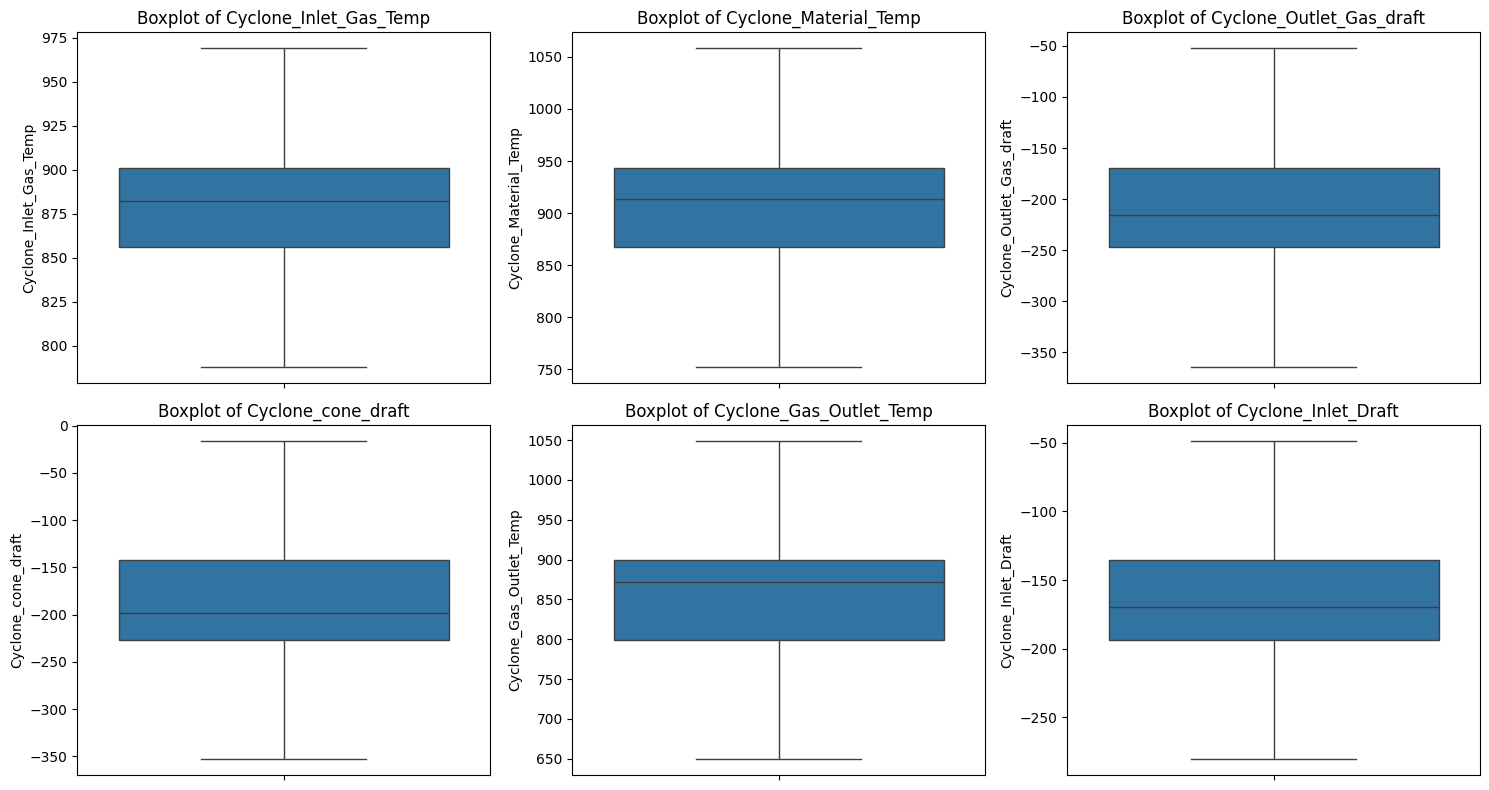

In [18]:
df_temp = df.copy()
df_temp = df.drop(columns = ['time'])

num_features = len(df_temp)

fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()  

for i, col in enumerate(df_temp.columns):
    if col == 'time':
        pass
    sns.boxplot(y = df_temp[col], ax = axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Outliers have been handled.

>##### __1.4 Summary statistics & correlation matrix__

In [19]:
df.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,377719.000000,377719.000000,377719.000000,377719.000000,377719.000000,377719.000000
mean,2018-10-18 18:14:59.999999232,869.919131,890.063209,-188.900822,-167.130453,829.701829,-151.226320
min,2017-01-01 00:00:00,788.100000,752.307500,-364.022500,-353.140000,649.340000,-280.360000
25%,2017-11-24 21:07:30,855.900000,867.080000,-247.150000,-226.720000,799.280000,-193.450000
50%,2018-10-18 18:15:00,882.320000,913.230000,-215.080000,-198.430000,871.400000,-169.360000
75%,2019-09-11 15:22:30,901.100000,943.595000,-169.235000,-142.440000,899.240000,-135.510000
max,2020-08-04 12:30:00,968.900000,1058.367500,-52.362500,-16.020000,1049.180000,-48.600000
std,NaN,48.412216,78.831552,79.099634,85.144410,102.061391,59.663736


Description:

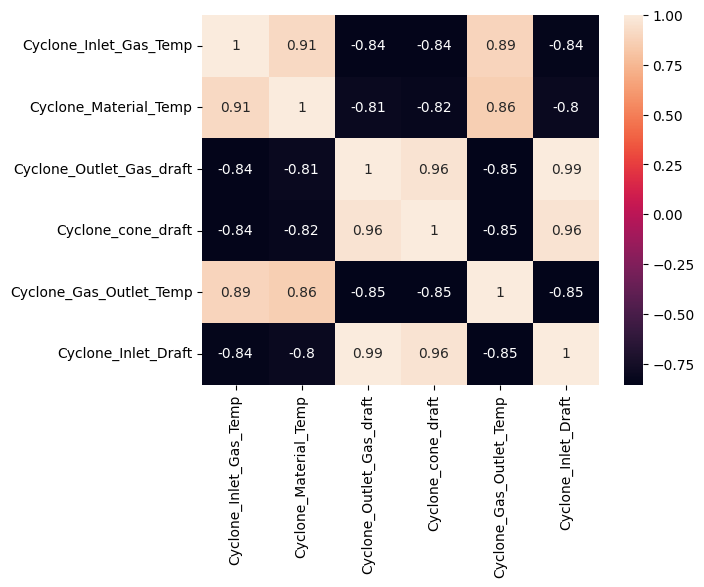

In [20]:
corr = df_temp.corr()
sns.heatmap(corr, annot = True)
plt.show()

Description:

>##### __1.5 Visualizing representative slices__

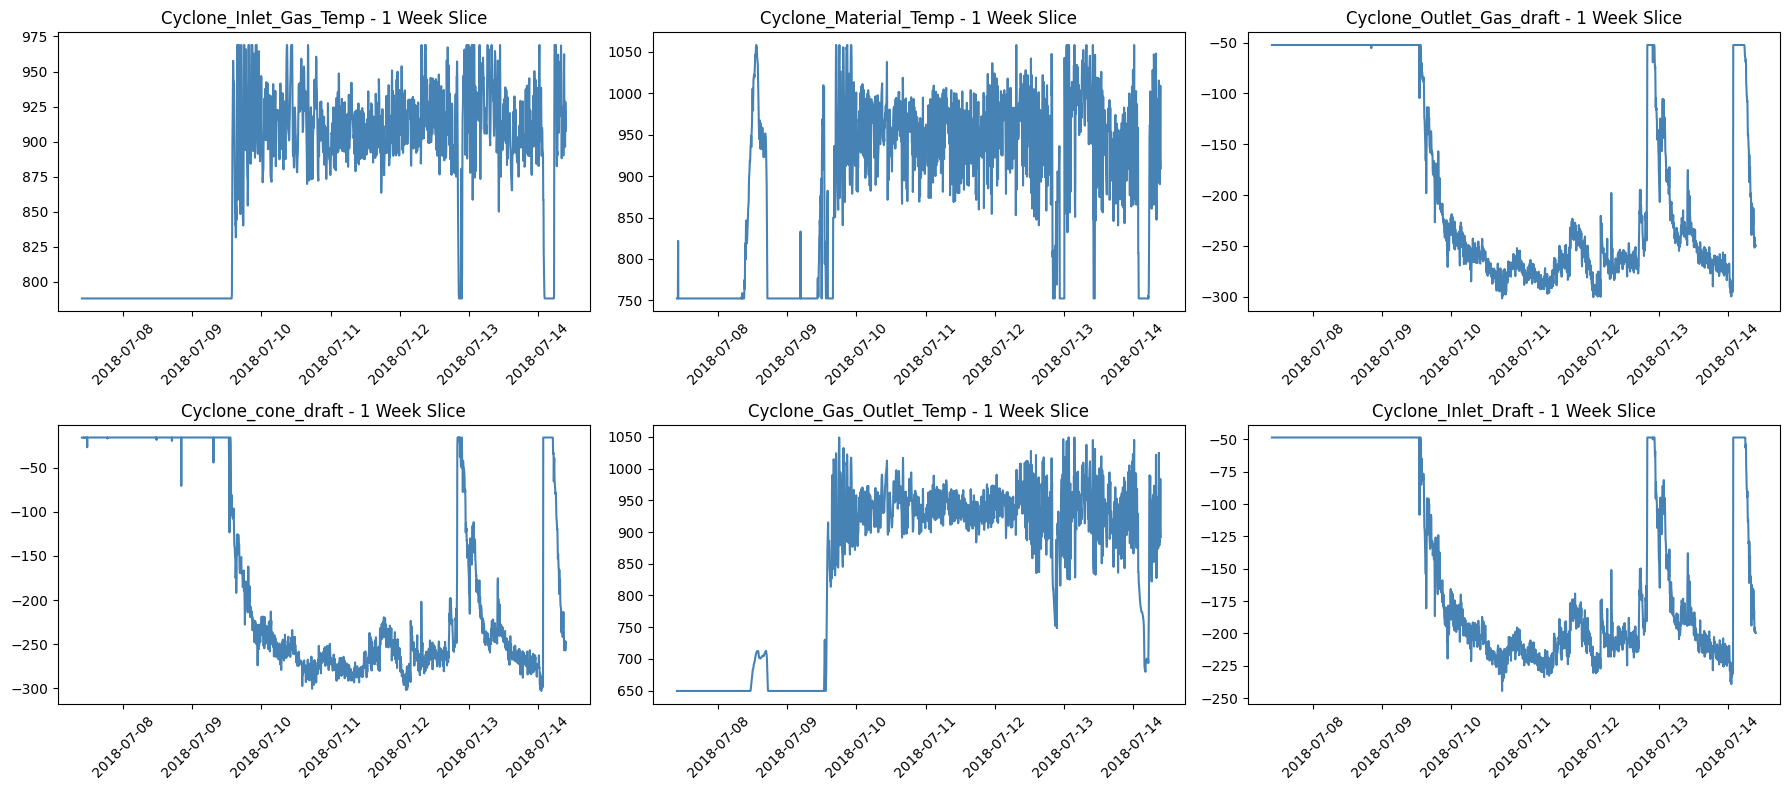

In [21]:
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
variables = df.columns 

# random week
start_week = np.random.choice(df.index[:-288*7])  # 288 points/day × 7
end_week = start_week + pd.Timedelta(days = 7)
week_slice = df.loc[start_week:end_week]

fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].plot(week_slice.index, week_slice[var], color = 'steelblue')
    axes[i].set_title(f"{var} - 1 Week Slice")
    axes[i].tick_params(axis='x', rotation = 45)
plt.tight_layout()
plt.show()

Description:

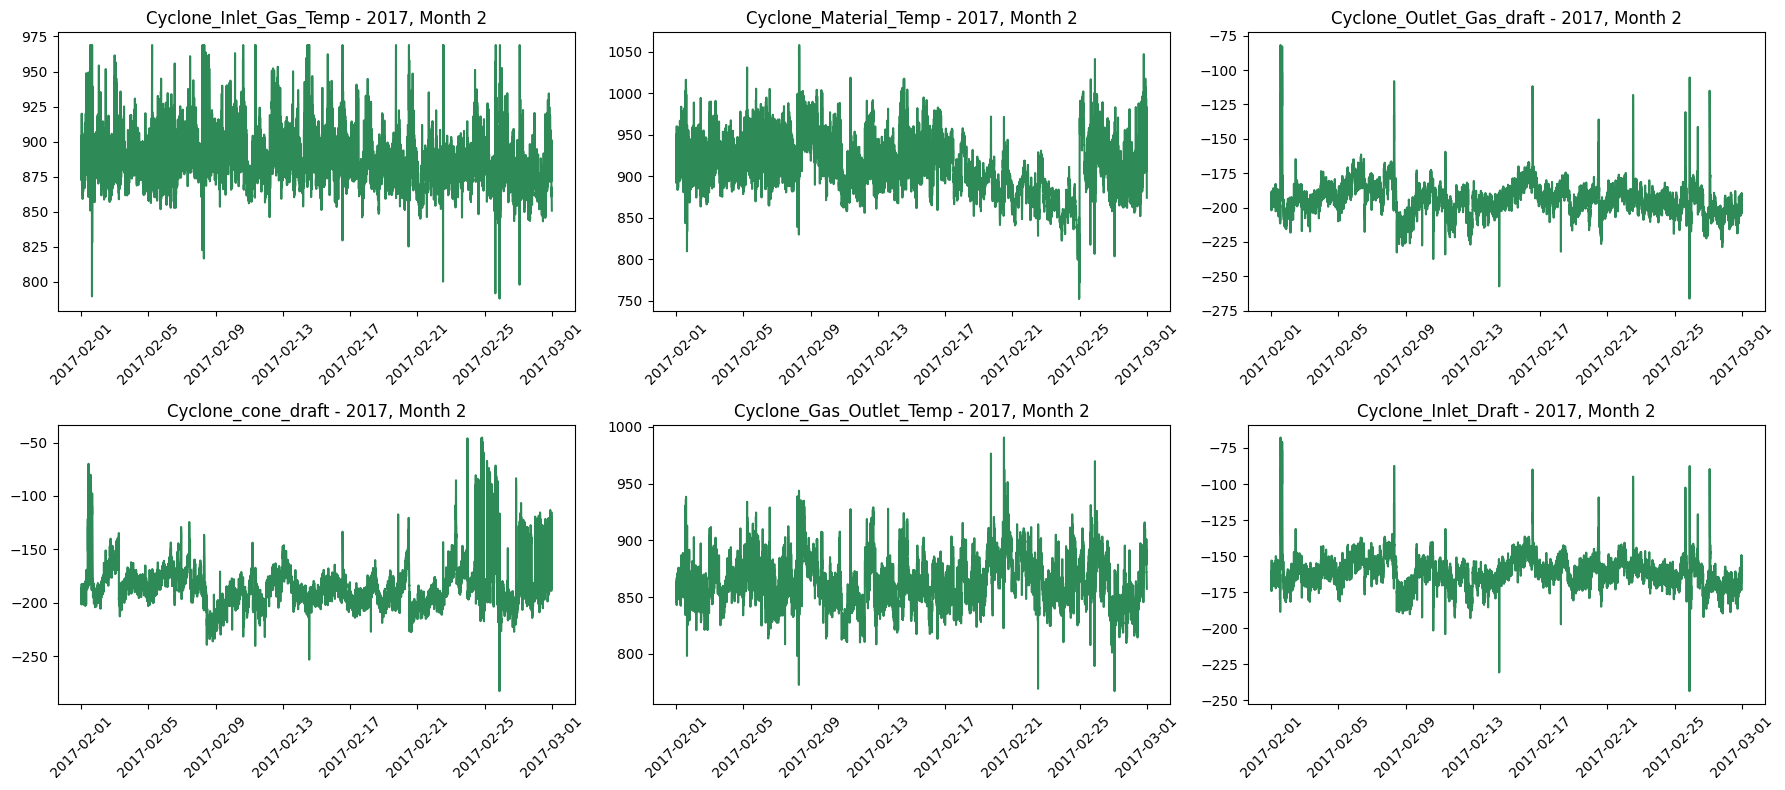

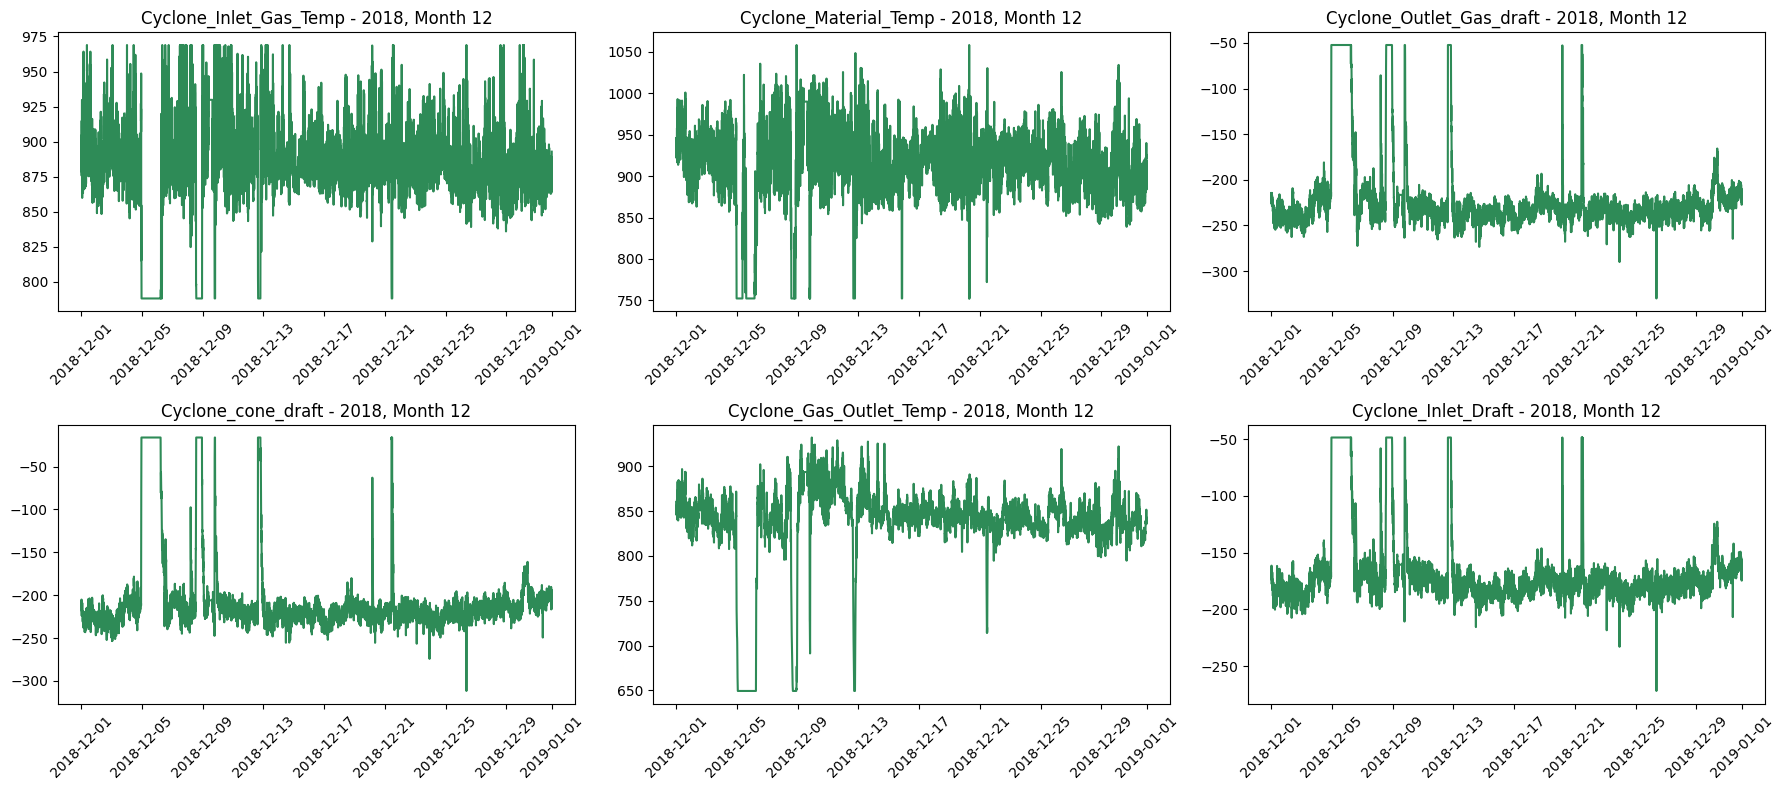

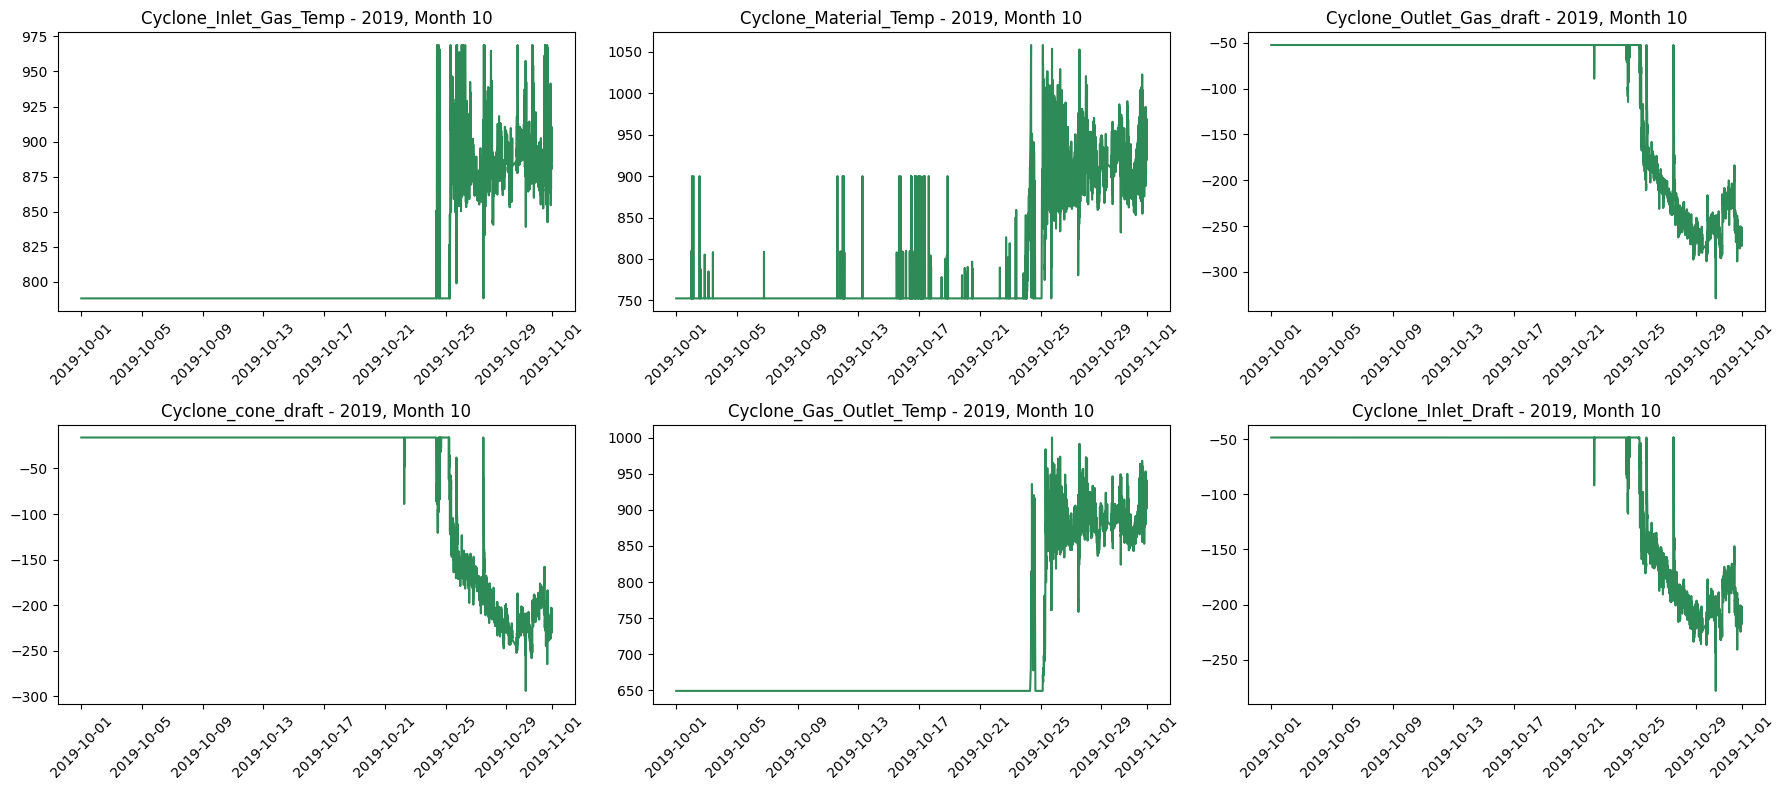

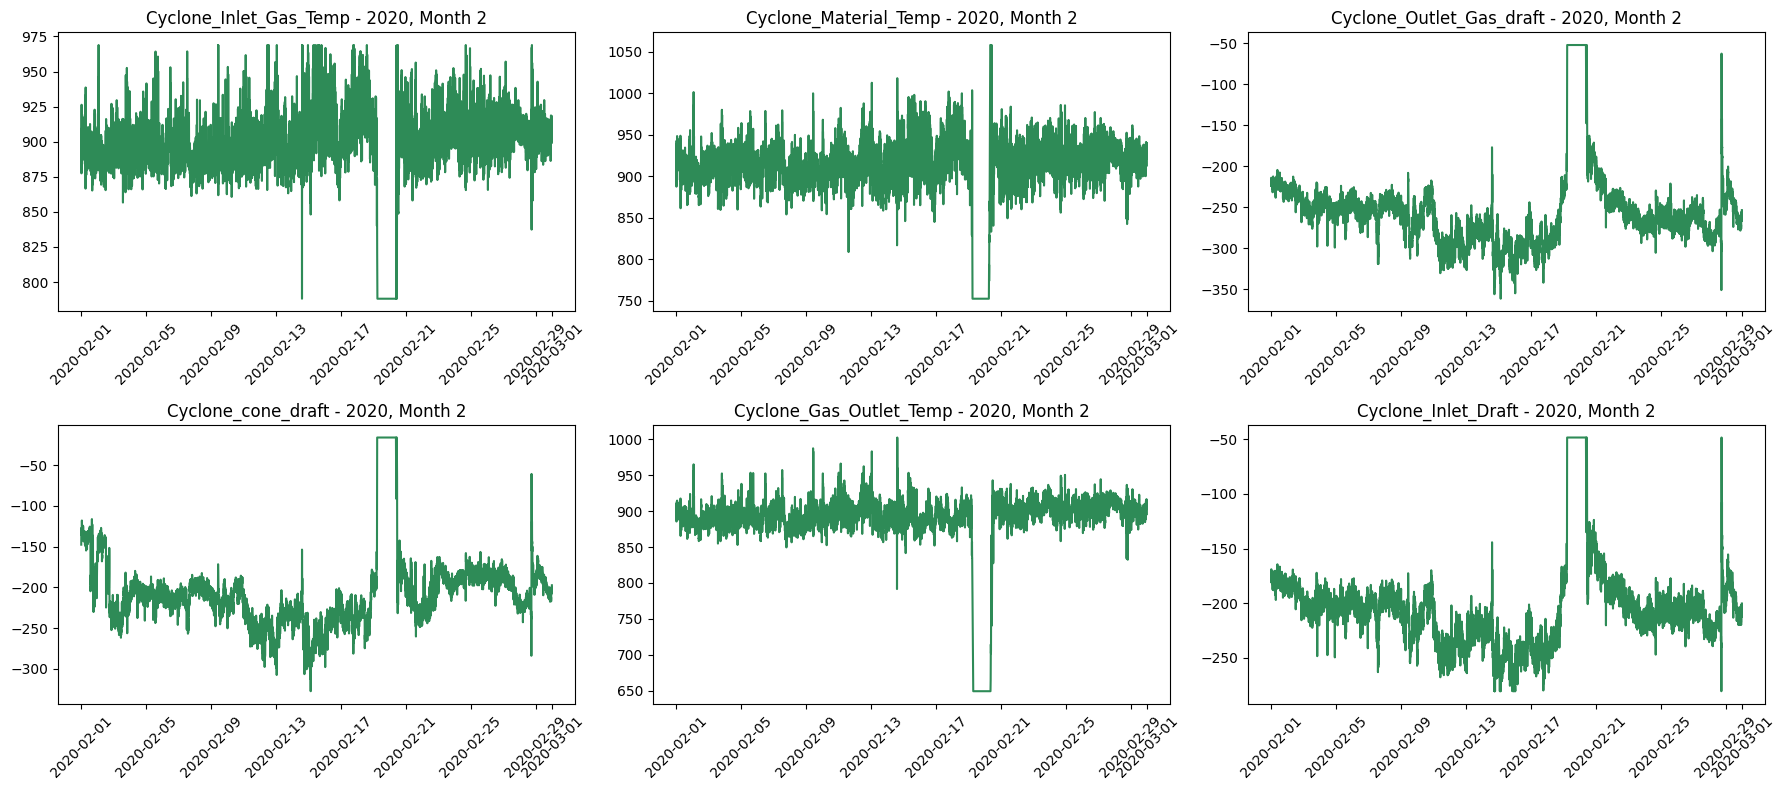

In [22]:
# random month per year
years = df.index.year.unique()
for y in years:
    year_slice = df[df.index.year == y]
    month = np.random.choice(year_slice.index.month.unique())
    month_slice = year_slice[year_slice.index.month == month]
    
    fig, axes = plt.subplots(2, 3, figsize = (18, 8))
    axes = axes.flatten()
    for i, var in enumerate(variables):
        axes[i].plot(month_slice.index, month_slice[var], color = 'seagreen')
        axes[i].set_title(f"{var} - {y}, Month {month}")
        axes[i].tick_params(axis='x', rotation = 45)
    plt.tight_layout()
    plt.show()

Description:

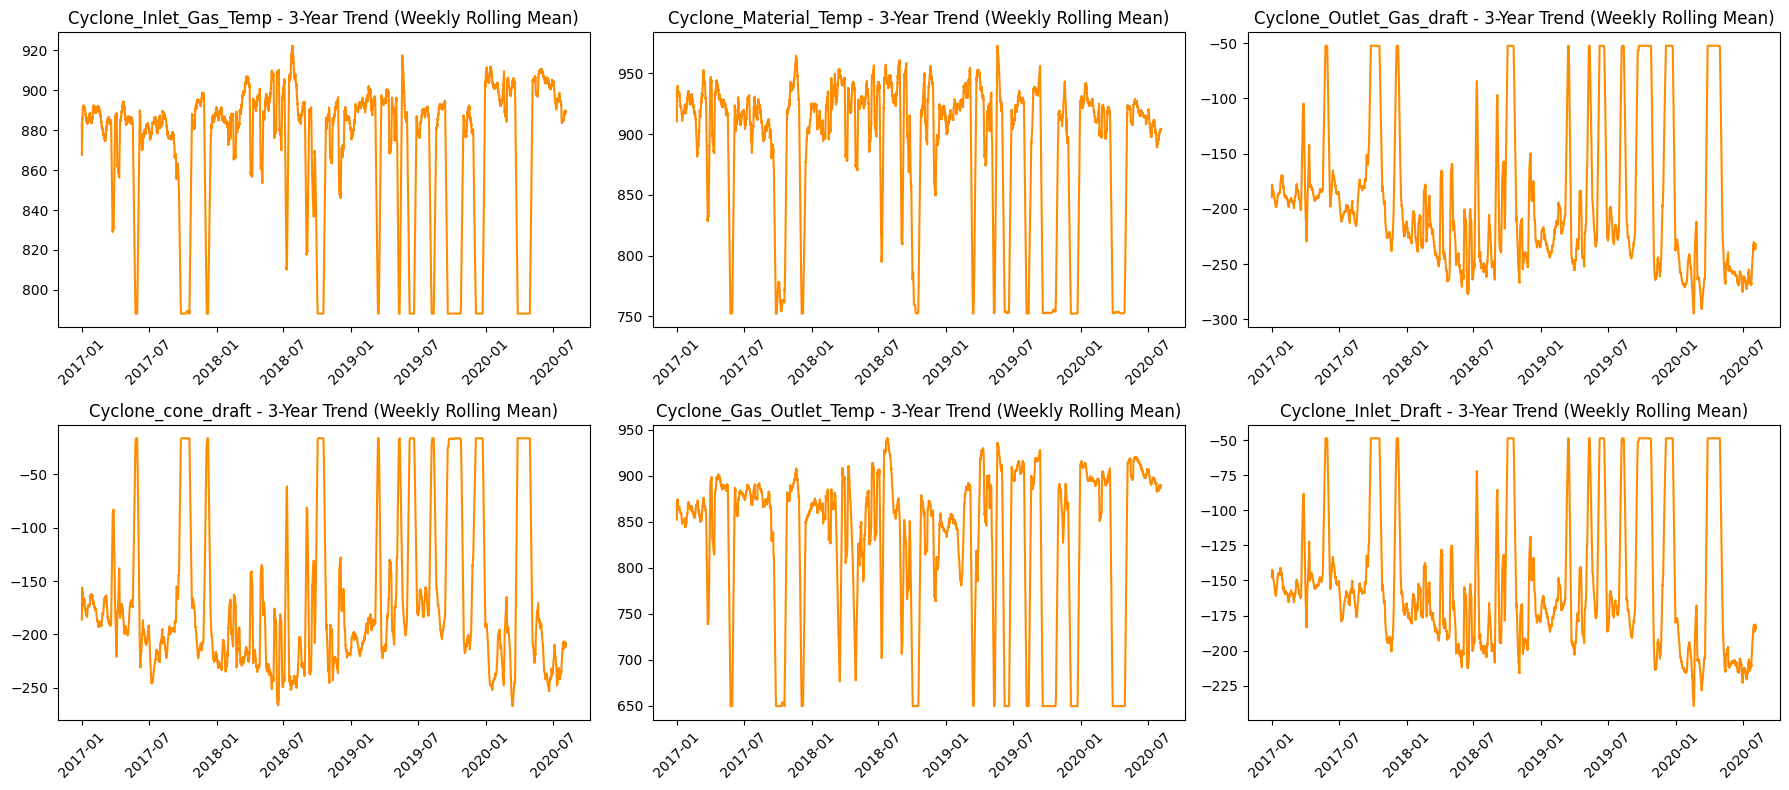

In [23]:
# entire 3-year trend
# weekly rolling mean to smooth daily noise
rolling_window = 288 * 7  

fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.flatten()
for i, var in enumerate(variables):
    axes[i].plot(df.index, df[var].rolling(window = rolling_window, min_periods = 1).mean(), color = 'darkorange')
    axes[i].set_title(f"{var} - 3-Year Trend (Weekly Rolling Mean)")
    axes[i].tick_params(axis='x', rotation = 45)   
plt.tight_layout()
plt.show()

Description:

### 2. Shutdown / Idle Period Detection

>##### __2.1 Programmatically detect and segment shutdown or idle periods__

In [24]:
df = pd.read_excel("data.xlsx")
df.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


From the dataset, we can see that there are several points where the sensor goes to shutdown. This is denoted by the keyword _I/O Timeout_. 

In [25]:
df_temp = df.copy()
df_temp.drop(columns = ['time'], inplace = True)

In [26]:
def get_idle_idx(df, col):
    ids = []
    for i in range(len(df)):
        if df[col].iloc[i] == "I/O Timeout":
            ids.append(i)
    return ids

column_timeout_indices = {}

for col in df.columns:
    ids = get_idle_idx(df, col)
    if ids:  
        column_timeout_indices[col] = ids

if column_timeout_indices:
    reference_indices = list(column_timeout_indices.values())[0]
    
    all_same = all(ids == reference_indices for ids in column_timeout_indices.values())
    
    if all_same:
        print("All columns have I/O Timeouts at the SAME indices")
        print(f"Common indices: {reference_indices}")
    else:
        print("Columns have I/O Timeouts at DIFFERENT indices")
        print("\nBreakdown by column:")
        for col, ids in column_timeout_indices.items():
            print(f"  {col}: {ids}")
        
        common_indices = set(reference_indices)
        for ids in column_timeout_indices.values():
            common_indices &= set(ids)
        print(f"\nCommon indices across all columns: {sorted(common_indices)}")
else:
    print("No I/O Timeouts found in any column")

All columns have I/O Timeouts at the SAME indices
Common indices: [2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 5597, 15376, 15377, 15379, 15380, 15381, 15382, 15383, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 27753, 27754, 27755, 27756, 27757, 40190, 40191, 40192, 40193, 40194, 40195, 40196, 40197, 40198, 40199, 40200, 40201, 40202, 40203, 40204, 40205, 40206, 40207, 40208, 40209, 40210, 40211, 40212, 40213, 40214, 40215, 40216, 49940, 49941, 49942, 49943, 49944, 49945, 49946, 49947, 49948, 49949, 49950, 62379, 62380, 62381, 62382, 62383, 62384, 62385, 62386, 62387, 62388, 62389, 62390, 62391, 62392, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 69252, 69253, 74788, 74789, 74790, 74791, 74792, 74793, 74794

We have detected two things:
1. Sensor goes idle at the same time for all the measurements
2. The idle state once started, stays idle for some continuous amount of time

>##### __2.2 Compute total downtime and number of shutdown events across 3 years__

In [27]:
print(f"Total number of shutdowns: {len(reference_indices)}")
print(f"Total downtime: {(len(reference_indices) * 5) / 60:.2f} hours")

Total number of shutdowns: 470
Total downtime: 39.17 hours


>##### __2.3 Provide a visualization of one full year with shutdowns clearly highlighted__

In [28]:
df = pd.read_excel('data.xlsx')
df_temp = df.copy()

In [29]:
shutdown_set = set(reference_indices)
df_temp['shutdown'] = df_temp.index.isin(shutdown_set).astype(int)
df_temp = df_temp.set_index('time')
df_temp = df_temp.apply(pd.to_numeric, errors = 'coerce')

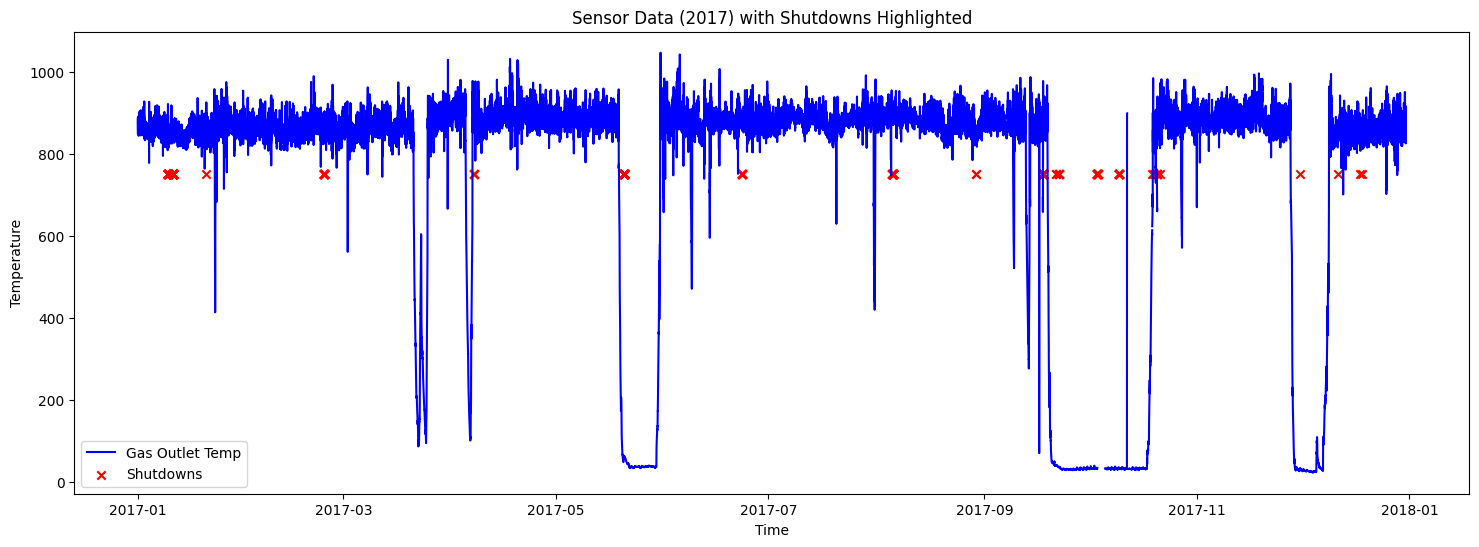

In [30]:
yr = '2017'
year_df = df_temp.loc[yr]

plt.figure(figsize = (18, 6))

plt.plot(year_df.index, year_df['Cyclone_Gas_Outlet_Temp'], label = "Gas Outlet Temp", color = "blue")

shutdown_times = year_df[year_df['shutdown'] == 1].index
plt.scatter(shutdown_times, 
            [year_df['Cyclone_Gas_Outlet_Temp'].mean()] * len(shutdown_times), 
            color = "red", marker = "x", label = "Shutdowns")

plt.title(f"Sensor Data ({yr}) with Shutdowns Highlighted")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

Description:

### 3. Machine State Segmentation (Clustering)

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load data
df = pd.read_excel('data.xlsx')

# Replace 'I/O Timeout' with 0
df.replace('I/O Timeout', 0, inplace=True)

# Convert to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill any remaining NaNs with column mean
df.fillna(df.mean(), inplace=True)

# Features
features = df.columns[1:]
X = df[features].values

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
labels = kmeans.fit_predict(X_scaled)

df['state'] = labels

In [62]:
cluster_summary = df.groupby('state')[features].agg(['mean','std','min','max','count'])
print(cluster_summary)

      Cyclone_Inlet_Gas_Temp                                      \
                        mean         std    min      max   count   
state                                                              
0                 892.299996   29.045245   0.00  1157.63  293726   
1                  60.225488   76.403784   0.00   563.47   71401   
2                 635.234534  170.658911  96.39  1081.03   12592   

      Cyclone_Material_Temp                                      ...  \
                       mean         std    min      max   count  ...   
state                                                            ...   
0                922.697375   70.071409 -185.0  1375.00  293726  ...   
1                 58.544318  126.206017 -185.0  1022.53   71401  ...   
2                639.188884  274.849918 -185.0  1375.00   12592  ...   

      Cyclone_Gas_Outlet_Temp                                     \
                         mean         std    min     max   count   
state                 

In [63]:
# Count of points per cluster
state_counts = df['state'].value_counts()

# Duration in minutes (5-minute intervals)
state_duration = state_counts * 5
print(state_duration)

state
0    1468630
1     357005
2      62960
Name: count, dtype: int64


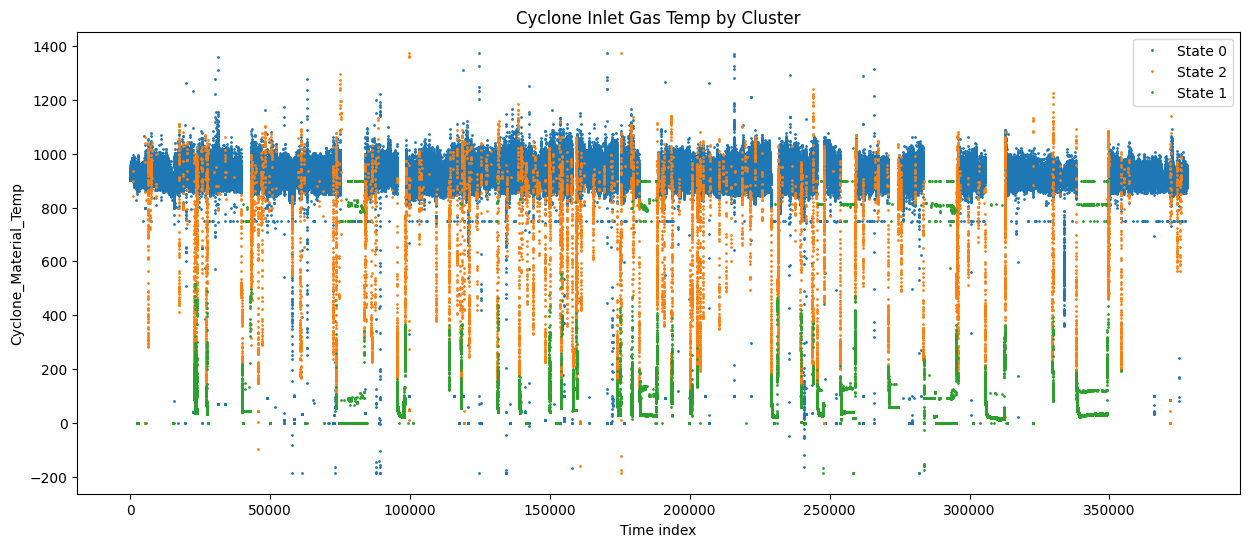

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
for state in df['state'].unique():
    subset = df[df['state'] == state]
    plt.plot(subset.index, subset['Cyclone_Material_Temp'], 
             linestyle='', marker='.', markersize=2, label=f'State {state}')
plt.xlabel('Time index')
plt.ylabel('Cyclone_Material_Temp')
plt.title('Cyclone Inlet Gas Temp by Cluster')
plt.legend()
plt.show()

### 4. Contextual Anomaly Detection + Root Cause Analysis

### 5. Short-Horizon Forecasting 

### 6. Insights & Storytelling